<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/Blublublu/library_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project: Compare Big Data using Pandas**

**Group Name: Blublublu**

**Group Member:**

|   Name       | Matric No. |
|:------------:|:-----------:|
| ANG YI QIN   |  A21EC0163  |
| SOO WAN YING |  A21EC0227  |
| LAU YEE CHI  |  A21EC0042  |
| LIEW YVONNE  |  A21EC0045  |

In this project, we're exploring and analyzing the [Airline Delay Analysis](https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis?select=airline+delay+analysis) dataset from Kaggle. This dataset contains a lot of information about airline flights, including dates, airlines, delays at departure and arrival, reasons for delays, and other operational details. Our main goal in this project is to use the pandas library, a powerful tool in Python for working with data, to thoroughly investigate and understand this airline delay dataset. The project aims to uncover insights into various facets of airline operations, including on-time performance, operational metrics, and delay resolution.

### **Airline Delay Analysis**

**Dataset used**: [Airline Delay Analysis](https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis)

- The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. I came across this useful data from DOT's database at working and figured this would be a really helpful dataset: Summary information on the number of on-time, delayed, canceled, and diverted flight.
- The datasets contain daily airline information covering from flight information, carrier company, to taxing-in, taxing-out time, and generalized delay reason of exactly 10 years, from 2009 to 2019. The DOT's database is renewed from 2018, so there might be a minor change in the column names. In this assignment, we use dataset of flight information in **2018** to do EDA and visualization.
-The flight delay and cancellation data were collected and managed by the DOT's Bureau of Transportation Statistics, only included data related to time-analysis on each flight.

## **Downloading the Dataset**

In [1]:
# Install opendatasets pacakage
!pip install opendatasets

Download the data, and list the files within the dataset.

In [2]:
import pandas as pd
import opendatasets as od
import warnings
import glob
warnings.filterwarnings('ignore')
from google.colab import files

# Import dataset
od.download("https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis")

Skipping, found downloaded files in "./airline-delay-analysis" (use force=True to force download)


Load a dataset from a CSV file

In [3]:
from google.colab import files

# Load the dataset
file_path = '/content/airline-delay-analysis/airline delay analysis/2018.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

The dataset has been downloaded and extracted.

## **Data Preparation and Cleaning**

Data preparation and cleaning are crucial steps in the exploratory data analysis (EDA) process. These steps involve loading the dataset, handling missing values, converting data types, and addressing any inconsistencies. Proper data preparation ensures that the dataset is in a suitable format for analysis, reducing the risk of biased or inaccurate results.

Explore the dataset

In [4]:
%%time
# Check the datatypes
df.dtypes

CPU times: user 244 µs, sys: 70 µs, total: 314 µs
Wall time: 321 µs


FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

In [5]:
%%time
# Display the first few rows of the dataset
df.head(10)

CPU times: user 119 µs, sys: 34 µs, total: 153 µs
Wall time: 158 µs


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-01-01,UA,2422,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,...,93.0,79.0,62.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-01-01,UA,2421,IAH,LAS,750,747.0,-3.0,14.0,801.0,...,206.0,193.0,173.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,UA,2420,DEN,CID,1324,1318.0,-6.0,11.0,1329.0,...,115.0,102.0,85.0,692.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-01-01,UA,2419,SMF,EWR,2224,2237.0,13.0,10.0,2247.0,...,314.0,299.0,280.0,2500.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-01-01,UA,2418,RIC,DEN,1601,1559.0,-2.0,12.0,1611.0,...,252.0,237.0,217.0,1482.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
%%time
# Obtain description of the dataset
df.describe()

CPU times: user 5.97 s, sys: 133 ms, total: 6.1 s
Wall time: 6.23 s


,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,7.213446e+06,7.213446e+06,7.101129e+06,7.096212e+06,7.097616e+06,7.097617e+06,7.094200e+06,7.094200e+06,7.213446e+06,7.094201e+06,...,7.213436e+06,7.079004e+06,7.079004e+06,7.213446e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,0.0
mean,2.607531e+03,1.329687e+03,1.333854e+03,9.969858e+00,1.741061e+01,1.357799e+03,1.462162e+03,7.601246e+00,1.486341e+03,1.466784e+03,...,1.411356e+02,1.364999e+02,1.115020e+02,7.999895e+02,1.945501e+01,3.636459e+00,1.588547e+01,9.353890e-02,2.564412e+01,NaN
std,1.860122e+03,4.909320e+02,5.045055e+02,4.482964e+01,9.920409e+00,5.059721e+02,5.334675e+02,6.064797e+00,5.183124e+02,5.377089e+02,...,7.334433e+01,7.313758e+01,7.111293e+01,5.981783e+02,5.890812e+01,2.999601e+01,3.589350e+01,3.174306e+00,4.978776e+01,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.220000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-9.900000e+01,1.400000e+01,7.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.029000e+03,9.150000e+02,9.160000e+02,-5.000000e+00,1.100000e+01,9.320000e+02,1.044000e+03,4.000000e+00,1.100000e+03,1.049000e+03,...,8.800000e+01,8.300000e+01,6.000000e+01,3.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,2.131000e+03,1.320000e+03,1.326000e+03,-2.000000e+00,1.500000e+01,1.340000e+03,1.502000e+03,6.000000e+00,1.515000e+03,1.506000e+03,...,1.220000e+02,1.180000e+02,9.200000e+01,6.320000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,NaN
75%,4.074000e+03,1.735000e+03,1.744000e+03,7.000000e+00,2.000000e+01,1.759000e+03,1.911000e+03,9.000000e+00,1.919000e+03,1.916000e+03,...,1.710000e+02,1.670000e+02,1.410000e+02,1.034000e+03,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.100000e+01,NaN
max,7.909000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.960000e+02,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.400000e+03,...,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03,NaN


In [7]:
%%time
# Obtain information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [8]:
%%time
# Check missing data
df.isna().sum()

CPU times: user 7.87 s, sys: 91.9 ms, total: 7.96 s
Wall time: 11.7 s


FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

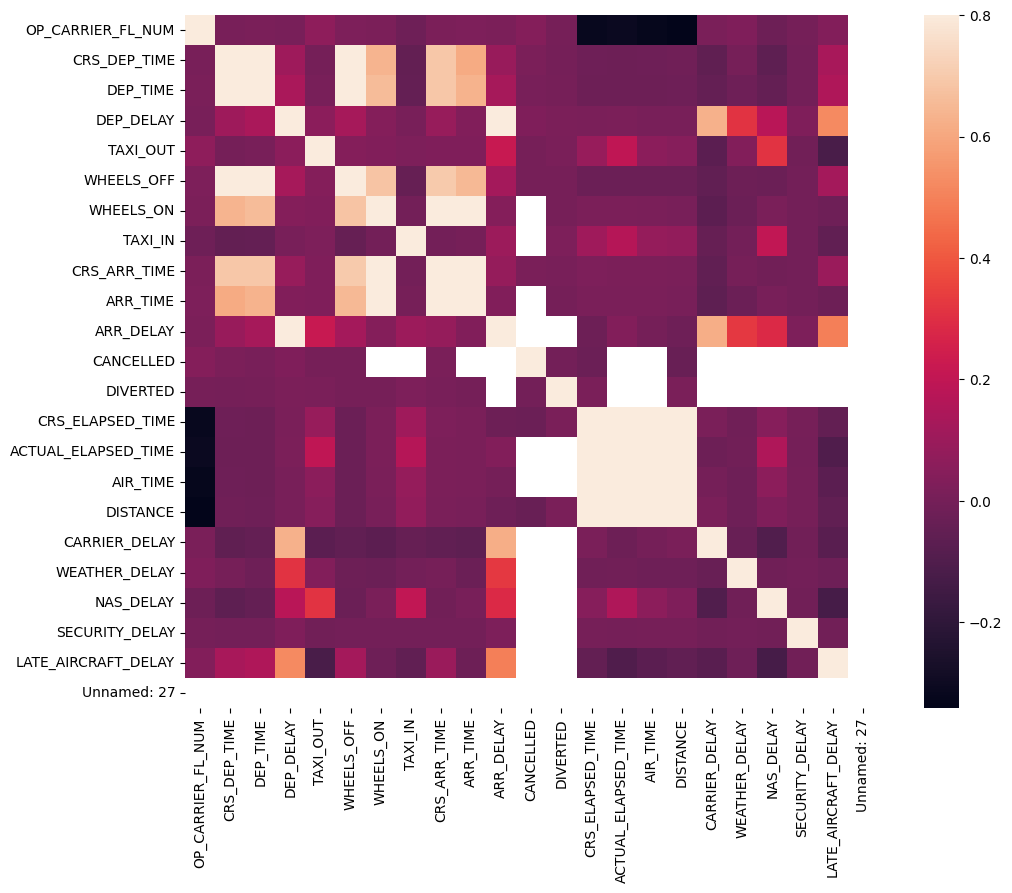

CPU times: user 7.17 s, sys: 873 ms, total: 8.04 s
Wall time: 10.4 s


In [9]:
%%time
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels=corrmat.columns, yticklabels=corrmat.columns)
plt.show()

> Through the correlation matrix, we can see how some of the 23 variables in the dataset present multicollinearity, which can be linearly predicted from the others. In order to have a better analysis and qork qith a lighter dataset, we are going to delete some of those unwanted variables.

In [10]:
%%time
#  Converting the 'FL_DATE' column to datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df.dtypes

CPU times: user 592 ms, sys: 1.01 ms, total: 593 ms
Wall time: 594 ms


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAF

In [11]:
%%time
len(df)

CPU times: user 22 µs, sys: 3 µs, total: 25 µs
Wall time: 28.6 µs


7213446

In [12]:
%%time
# Create a new column to represent the status of the flight
df['STATUS'] =df['ARR_DELAY'].apply(lambda x: 0 if x <= 15 else 1 if x <= 30 else 2 if x <= 60 else 3 if x <= 120 else 4)

CPU times: user 1.72 s, sys: 262 ms, total: 1.99 s
Wall time: 1.99 s


> Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes.

In [14]:
%%time
# Drop unnecessary column
df = df.drop(columns=['DEP_DELAY', 'ARR_TIME','CRS_ARR_TIME', 'ACTUAL_ELAPSED_TIME', 'CRS_ELAPSED_TIME',
                      'DIVERTED','CANCELLED','DISTANCE','OP_CARRIER_FL_NUM','Unnamed: 27'])

CPU times: user 175 ms, sys: 54.9 ms, total: 230 ms
Wall time: 231 ms


In [15]:
%%time
df.head(20)

CPU times: user 276 µs, sys: 0 ns, total: 276 µs
Wall time: 282 µs


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLATION_CODE,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,STATUS
0,2018-01-01,UA,EWR,DEN,1517,1512.0,15.0,1527.0,1712.0,10.0,-23.0,NaN,225.0,NaN,NaN,NaN,NaN,NaN,0
1,2018-01-01,UA,LAS,SFO,1115,1107.0,11.0,1118.0,1223.0,7.0,-24.0,NaN,65.0,NaN,NaN,NaN,NaN,NaN,0
2,2018-01-01,UA,SNA,DEN,1335,1330.0,15.0,1345.0,1631.0,5.0,-13.0,NaN,106.0,NaN,NaN,NaN,NaN,NaN,0
3,2018-01-01,UA,RSW,ORD,1546,1552.0,19.0,1611.0,1748.0,6.0,-2.0,NaN,157.0,NaN,NaN,NaN,NaN,NaN,0
4,2018-01-01,UA,ORD,ALB,630,650.0,13.0,703.0,926.0,10.0,14.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN,0
5,2018-01-01,UA,ORD,OMA,2241,2244.0,15.0,2259.0,1.0,2.0,-11.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,0
6,2018-01-01,UA,IAH,LAS,750,747.0,14.0,801.0,854.0,6.0,-16.0,NaN,173.0,NaN,NaN,NaN,NaN,NaN,0
7,2018-01-01,UA,DEN,CID,1324,1318.0,11.0,1329.0,1554.0,6.0,-19.0,NaN,85.0,NaN,NaN,NaN,NaN,NaN,0
8,2018-01-01,UA,SMF,EWR,2224,2237.0,10.0,2247.0,627.0,9.0,-2.0,NaN,280.0,NaN,NaN,NaN,NaN,NaN,0
9,2018-01-01,UA,RIC,DEN,1601,1559.0,12.0,1611.0,1748.0,8.0,-17.0,NaN,217.0,NaN,NaN,NaN,NaN,NaN,0


## **Exploratory Analysis and Visualization**




**1. Summarize the flights** - We will see the percentage of flights that have delayed and cancelled.

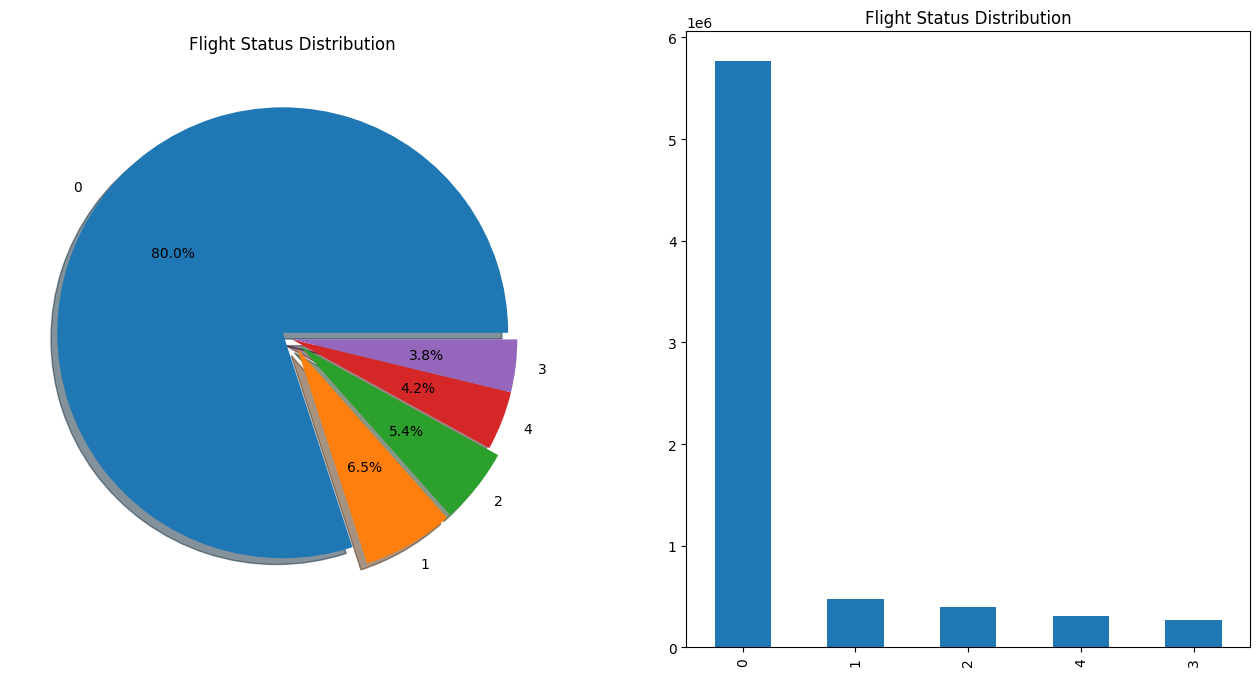

Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
CPU times: user 427 ms, sys: 48 ms, total: 475 ms
Wall time: 446 ms


In [16]:
%%time

# Create a DataFrame with 'STATUS' column
status_df = pd.DataFrame(df['STATUS'])

# Plotting Pie Chart
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
status_counts = status_df['STATUS'].value_counts()
status_counts.plot.pie(
    explode=[0.05, 0.05, 0.05, 0, 0],
    autopct='%1.1f%%',
    shadow=True
)
plt.title('Flight Status Distribution')
plt.ylabel('')

# Plotting Bar Chart
plt.subplot(1, 2, 2)
status_counts.plot.bar(figsize=(16, 8))
plt.title('Flight Status Distribution')

plt.show()

print('Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

> In 2008, 11.9% of domestic flights in the US were delayed by more than 15 minutes. 5.4% of total flights had delays of more than one hour. Another different interpretation is that 80% of flights are on time. Besides, 3.8% of flights is diverted and 4.2% of flights is cancelled.

**2. Cancelled flights** - We are going to investigate the relationship of cancelled flights and the reason behind. We will view the result of analysis through graph by visualization.

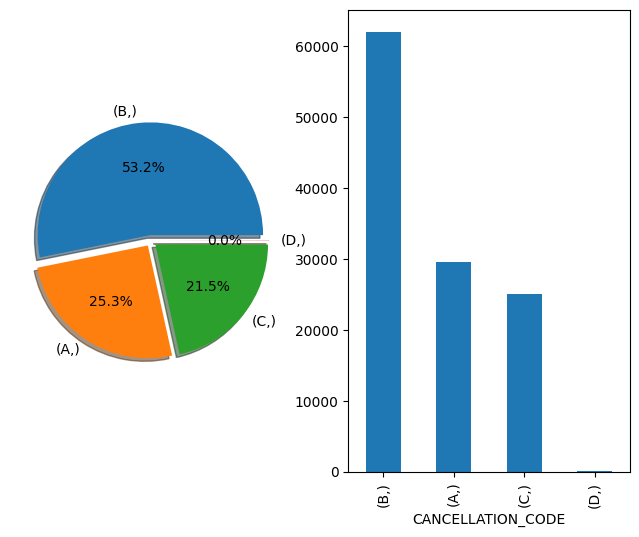

A = carrier, B = weather, C = NAS, D = security
CPU times: user 436 ms, sys: 53.1 ms, total: 489 ms
Wall time: 512 ms


In [17]:
%%time
# Select cancelled flights
CancelFlights = df[(df.STATUS == 4)]

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Generate a pie chart of cancellation codes
pd.DataFrame(CancelFlights['CANCELLATION_CODE']).value_counts().plot.pie(
    explode=[0.05, 0.05, 0.05, 0.05],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_ylabel('')

# Generate a bar chart of cancellation codes
pd.DataFrame(CancelFlights['CANCELLATION_CODE']).value_counts().plot.bar(figsize=(8, 6), ax=ax[1])

# Show the plots
plt.show()

# Print legend explaining cancellation codes
print('A = carrier, B = weather, C = NAS, D = security')

> From the pie chart above, we can see that weather delay has the most among all, which 53.2% of flight cancelled due to weather factor. Besides, 25.3% of flights cancelled due to carrier factor and 21.5% of flights cancelled due to NAS.

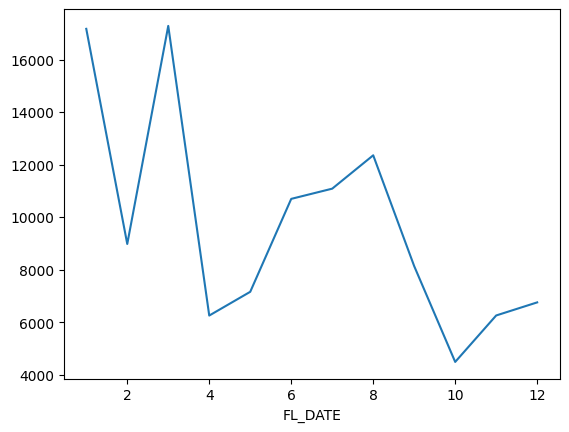

CPU times: user 284 ms, sys: 85.6 ms, total: 369 ms
Wall time: 335 ms


In [18]:
%%time
import datetime as dt

# Select cancelled flights
CancelFlights = df[(df.STATUS == 4)]

# Group by month and plot the count of cancelled flights
CancelFlights['CANCELLATION_CODE'].groupby(CancelFlights['FL_DATE'].dt.month).count().plot()
plt.show()

> As we can see in graph above, the first three months (from January to March) have the peak of flights being cancelled in 2018. Escpecially in January, with the winter weather comes with ice storm might affect the flight flying completion time. The bad weather might actually be the reason behind all the cancellations, since for the rest of the year does not appear such a high peak of cancellation. The compounded effect of the flights cancelled affect other programmed flights down the lane.

**3. Delayed flights** - We will explore the facts and insights about the delayed flights

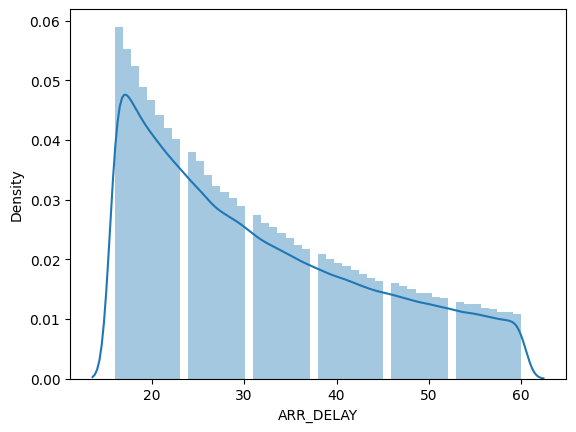

CPU times: user 2.76 s, sys: 216 ms, total: 2.97 s
Wall time: 2.75 s


In [19]:
%%time
Delayedflights = df[(df.STATUS >= 1) &(df.STATUS < 3)]
sns.distplot(Delayedflights['ARR_DELAY'])
plt.show()

> What can be seen on the histogram, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short.

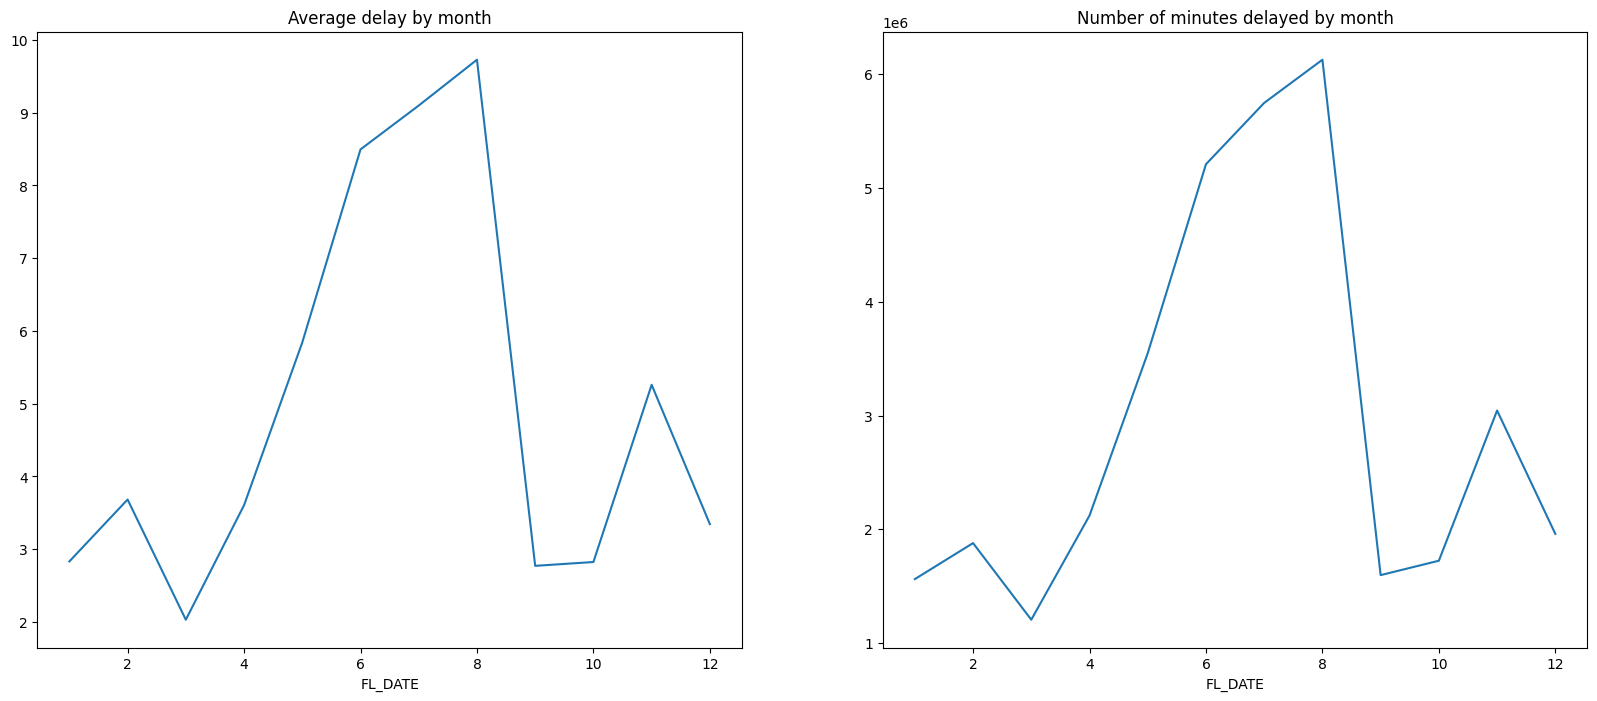

CPU times: user 967 ms, sys: 125 ms, total: 1.09 s
Wall time: 991 ms


In [20]:
%%time
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Average delay by month
df['ARR_DELAY'].groupby(df['FL_DATE'].dt.month).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')

# Number of minutes delayed by month
df['ARR_DELAY'].groupby(df['FL_DATE'].dt.month).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')

# Show the plot
plt.show()

> Delays focused on May to October, with the peak on average delays on August 2018.

**4. Delay reasons** - We will going to explore the causes of flights delays.

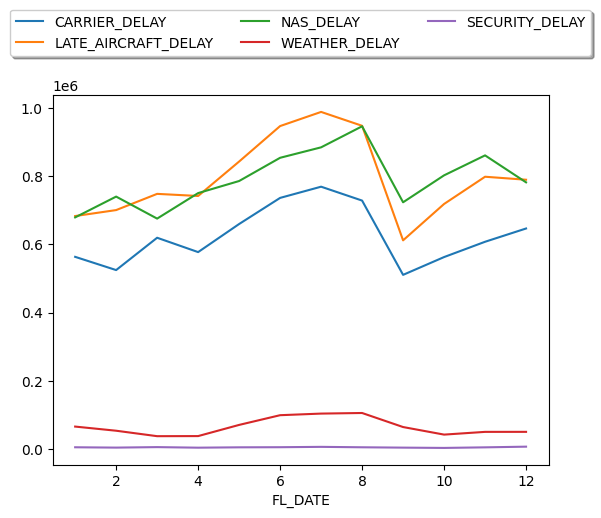

CPU times: user 264 ms, sys: 113 ms, total: 377 ms
Wall time: 261 ms


In [21]:
%%time
df2 = Delayedflights.filter(['FL_DATE', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY'], axis=1)
df2['FL_DATE'] = pd.to_datetime(df2['FL_DATE'])
df2 = df2.groupby(df2['FL_DATE'].dt.month)[['CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY']].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

**5. Relationship between variables** - We will going to explore the relationships between thses variables, especially on the causes of the dalayed flights.

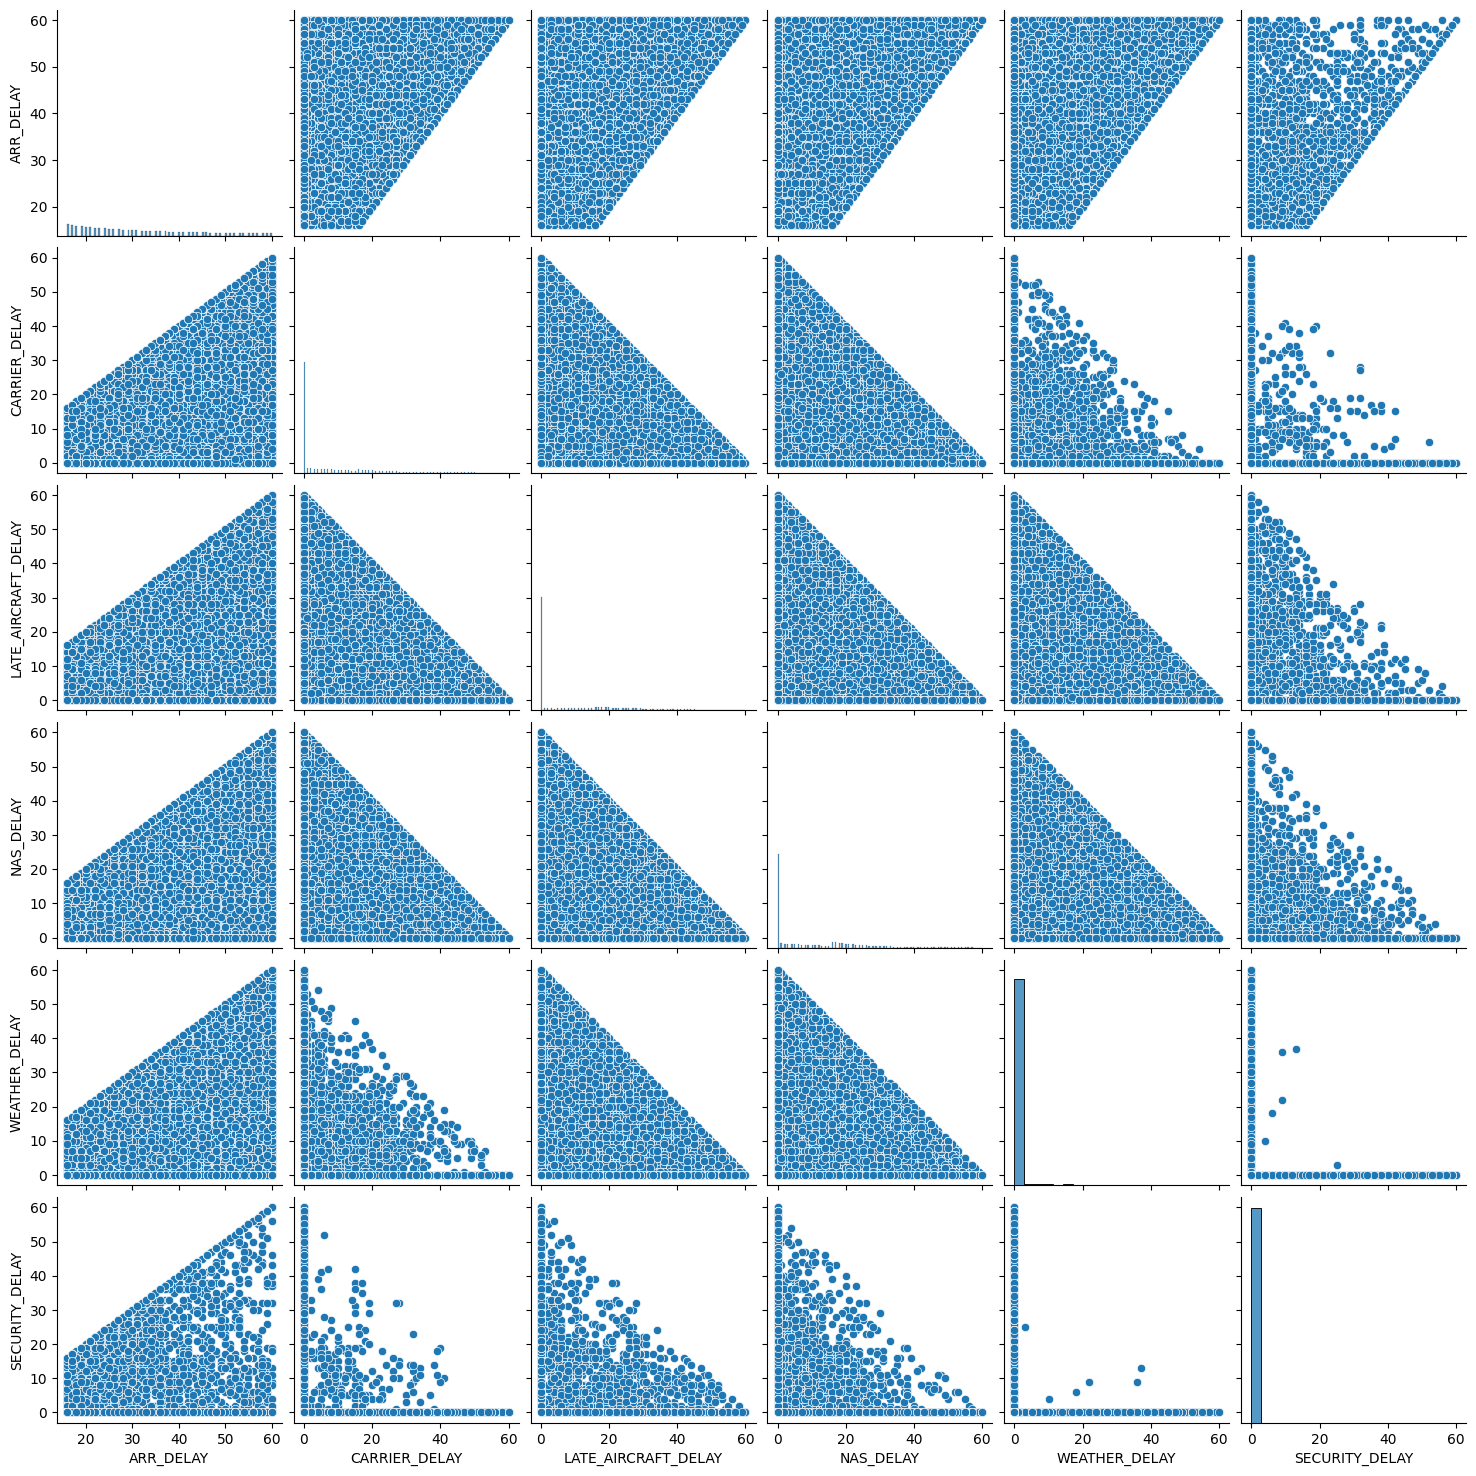

CPU times: user 48.8 s, sys: 782 ms, total: 49.6 s
Wall time: 49.4 s


In [22]:
%%time
cols = ['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY']
delay_pd = Delayedflights[cols]
sns.pairplot(delay_pd, height=2.5)
plt.show()

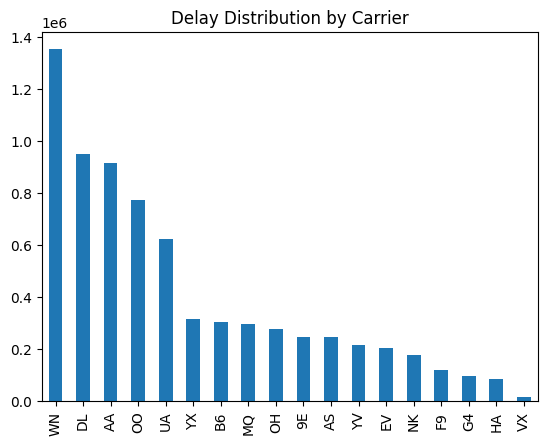

CPU times: user 679 ms, sys: 103 ms, total: 782 ms
Wall time: 673 ms


In [23]:
%%time
df['OP_CARRIER'].value_counts().plot.bar()
plt.title('Delay Distribution by Carrier')
plt.show()

## **Asking and Answering Questions**




#### **Q1: What percentage of flights experienced delays or cancellations?**

In [24]:
%%time
# Calculate the percentage of delayed flights
delayed_percentage = (df['ARR_DELAY'].notnull().sum() / len(df)) * 100

# Calculate the percentage of cancelled flights
cancelled_percentage = (df['CANCELLATION_CODE'].notnull().sum() / len(df)) * 100

print(f"Percentage of delayed flights: {delayed_percentage:.2f}%")
print(f"Percentage of cancelled flights: {cancelled_percentage:.2f}%")

Percentage of delayed flights: 98.10%
Percentage of cancelled flights: 1.62%
CPU times: user 148 ms, sys: 970 µs, total: 149 ms
Wall time: 149 ms


> The percentage of delayed flights is 98.10% while the percentage of cancelled flights: 1.62%.

#### **Q2: How do taxi-out and taxi-in times relate to overall delays?**



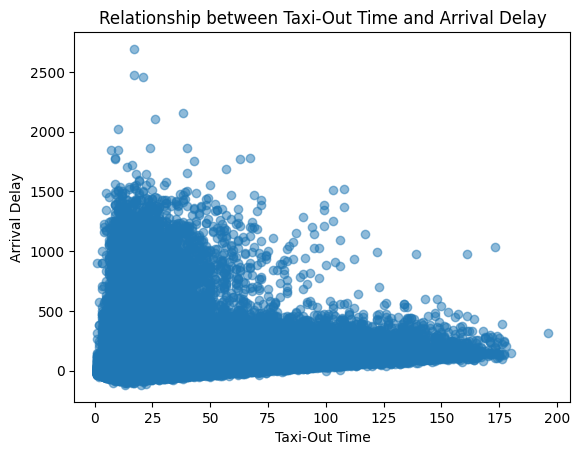

CPU times: user 12.9 s, sys: 177 ms, total: 13.1 s
Wall time: 13 s


In [25]:
%%time
# Scatter plot to analyze the relationship between taxi-out time and arrival delay
plt.scatter(df['TAXI_OUT'], df['ARR_DELAY'], alpha=0.5)
plt.xlabel('Taxi-Out Time')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Taxi-Out Time and Arrival Delay')
plt.show()

> This scatter plot graph explores the relationship between taxi-out time and arrival delay, providing insights into potential correlations.

#### **Q3: Are there specific months or seasons when flight cancellations are more frequent?**

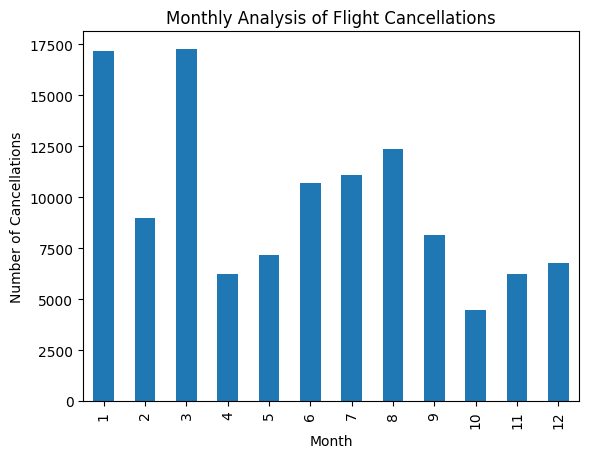

CPU times: user 919 ms, sys: 77.9 ms, total: 997 ms
Wall time: 1.02 s


In [26]:
%%time
df['Month'] = df['FL_DATE'].dt.month

# Count the number of cancellations per month
cancellations_by_month = df['CANCELLATION_CODE'].notnull().groupby(df['Month']).sum()

# Plot the results
cancellations_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Monthly Analysis of Flight Cancellations')
plt.show()

> Based on the analysis, the bar plot reveals that the month of January and March exhibits the highest frequency of flight cancellations. This indicates that, in the given dataset, January and March experiences a notable number of flight cancellations compared to other months.

#### **Q4: Do delays vary between daytime and nighttime flights?**

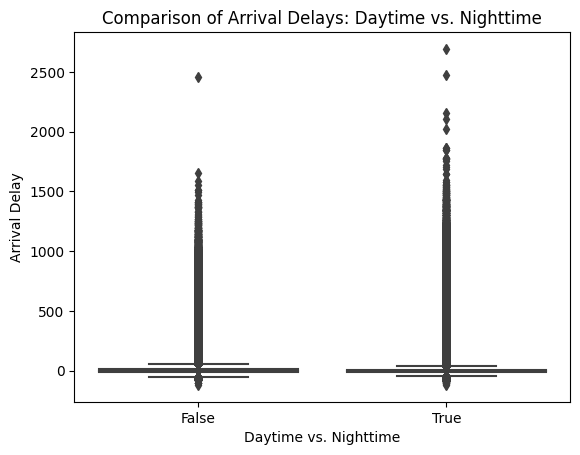

CPU times: user 1.68 s, sys: 175 ms, total: 1.85 s
Wall time: 1.73 s


In [27]:
%%time
df['Daytime'] = (df['CRS_DEP_TIME'] >= 600) & (df['CRS_DEP_TIME'] < 1800)

# Create a boxplot to compare delays during daytime and nighttime
sns.boxplot(x='Daytime', y='ARR_DELAY', data=df)
plt.xlabel('Daytime vs. Nighttime')
plt.ylabel('Arrival Delay')
plt.title('Comparison of Arrival Delays: Daytime vs. Nighttime')
plt.show()

> Based on the analysis, July and December have higher delays due to weather conditions.

#### **Q5: Is there a correlation between the air time of a flight and the arrival delay?**


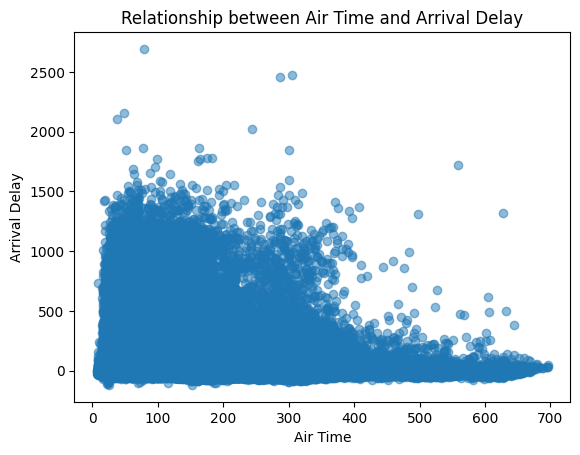

CPU times: user 12.9 s, sys: 165 ms, total: 13 s
Wall time: 12.9 s


In [28]:
%%time
# Scatter plot to analyze the relationship between air time and arrival delay
plt.scatter(df['AIR_TIME'], df['ARR_DELAY'], alpha=0.5)
plt.xlabel('Air Time')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Air Time and Arrival Delay')
plt.show()

> Based on the analysis, the percentage of flights delayed at departure but arriving on time is 17.82%.


#### **Q6: At what times of the day do delays occur most frequently?**

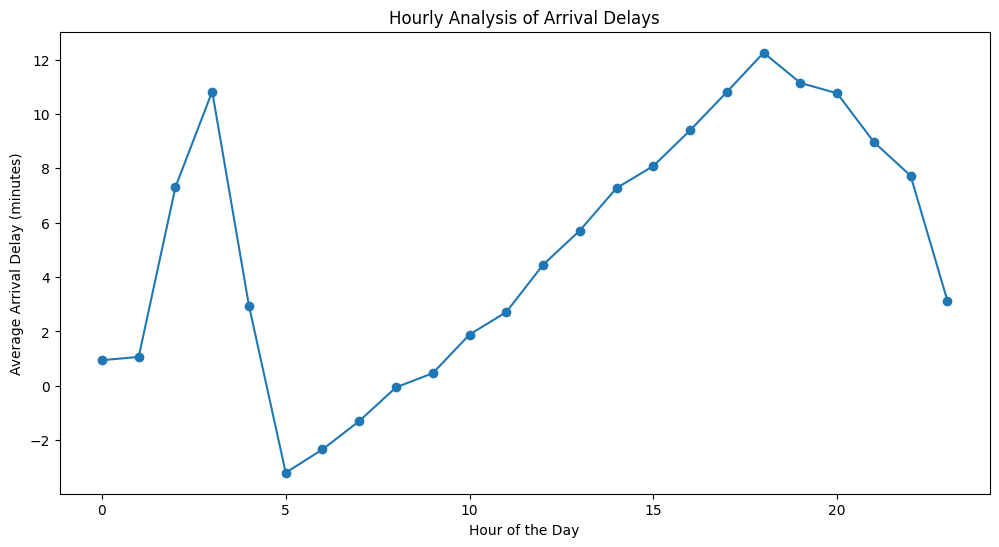

CPU times: user 284 ms, sys: 115 ms, total: 398 ms
Wall time: 283 ms


In [29]:
%%time
# Extract the hour from the scheduled departure time
df['Hour'] = df['CRS_DEP_TIME'] // 100

# Group by hour and calculate the average arrival delay
average_delay_by_hour = df.groupby('Hour')['ARR_DELAY'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_delay_by_hour.plot(marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Hourly Analysis of Arrival Delays')
plt.show()

> This code analyzes the average arrival delays for each hour of the day and visualizes the trends using a line plot. It shows that 15-20 hour of the day have the highest average arrival delay.

## **Inferences and Conclusion**


Throughout this assignment, using the Pandas library for conducting exploratory data analysis (EDA) on the flight delay dataset, we observed that Pandas provides a robust and user-friendly environment for data manipulation and exploration.

*   Efficiency:

> Pandas offers efficient data manipulation capabilities that expedite the EDA process. Its optimized algorithms and intuitive functions contribute to a streamlined workflow. The ability to work with smaller to moderately sized datasets in-memory efficiently caters to various analytical needs.



* Flexibility:

> Pandas demonstrates flexibility by seamlessly integrating with other popular data science libraries, including NumPy and Matplotlib. This integration allows analysts to leverage a rich ecosystem of tools for data analysis, visualization, and statistical modeling. Pandas' compatibility with diverse computing environments makes it adaptable for both local machine analysis and cloud-based workflows.

In conclusion, the exploration of the flight delay dataset using Pandas has showcased its versatility and effectiveness in handling data analysis tasks. Pandas remains a powerful choice for data analysts working with datasets that fit within the memory constraints of their machine. As we wrap up this analysis, the knowledge gained from using Pandas serves as a valuable asset for future data-driven endeavors in aviation analytics.

## **References and Future Work**

**Future Work**

> Future work in airline delay analysis could involve developing predictive models to forecast delays, exploring geospatial patterns in delays at specific airports or regions, and conducting an in-depth analysis of how different airlines handle and respond to delays. Enhancing weather analysis by integrating additional data sources, investigating the impact of delays on the passenger experience, and implementing real-time delay monitoring systems are also promising avenues.

**References**
* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Pandas ToolKit](https://github.com/pandas-dev/pandas)